In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/clee/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab', 'e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
# %load show_testedf.py
from __future__ import division, print_function

import sys
import numpy as np
import pylab

import edflib.edfreader as edfreader
ef = edfreader.EdfReader("../tests/test_generator.edf")

signal_labels = []
signal_nsamples = []

def fileinfo(edf):
    print("datarecords_in_file", edf.datarecords_in_file)
    print("signals_in_file:", edf.signals_in_file)
    nsigs = edf.signals_in_file
    for ii in range(nsigs):
        signal_labels.append(edf.signal_label(ii))
        print("signal_label(%d)" % ii, edf.signal_label(ii), end=" ")
        print( edf.samples_in_file(ii), edf.samples_in_datarecord(ii), end=" ")
        signal_nsamples.append(edf.samples_in_file(ii))
        print( edf.samplefrequency(ii))

fileinfo(ef)
nsamples = signal_nsamples[0]
nsigs = ef.signals_in_file
fs = ef.samplefrequency(0) # again know that this is uniform
# check this is rectangular
for ii in range(ef.signals_in_file):
    assert nsamples == signal_nsamples[ii]
    
allsig = np.zeros( (ef.signals_in_file, nsamples), dtype='float64')

def read_all():
    readpt = 0
    for ii in range(nsigs):
        ef.read_phys_signal(ii, readpt, nsamples, allsig[ii])

def plot_epoch(start=0.0,duration=10.0):
    "plot all the signals one above another in a 10 second epoch"
    from stacklineplot import stackplot
    x0 = start * fs
    x1 = (start + duration) *fs
    stackplot(allsig[:,x0:x1],seconds=duration, start_time=start, ylabels=signal_labels)


if False:
    # try pickout signal 5
    _edflib.rewind(ef.handle, 5)
    _edflib.read_int_samples(ef.handle, 5, Nibuf,ibuf)

    # figure()
    # stackplot(sigbufs,seconds=10.0, start_time = 5.0, ylabels=signal_labels)

    # this doesn't work    
    #offset, nr = ef.tryoffset()
    #dbuffer = ef.make_buffer()
    #ef.load_datarecord(dbuffer, 0)


    # ef.close()


    #f = _edflib.EdfReader("examples/PA32135H_1-1+.edf")
    #fileinfo(f)



datarecords_in_file 600
signals_in_file: 11
signal_label(0) squarewave 120000 200 200.00000000000003
signal_label(1) ramp 120000 200 200.00000000000003
signal_label(2) pulse 120000 200 200.00000000000003
signal_label(3) noise 120000 200 200.00000000000003
signal_label(4) sine 1 Hz 120000 200 200.00000000000003
signal_label(5) sine 8 Hz 120000 200 200.00000000000003
signal_label(6) sine 8.1777 Hz 120000 200 200.00000000000003
signal_label(7) sine 8.5 Hz 120000 200 200.00000000000003
signal_label(8) sine 15 Hz 120000 200 200.00000000000003
signal_label(9) sine 17 Hz 120000 200 200.00000000000003
signal_label(10) sine 50 Hz 120000 200 200.00000000000003


/Users/clee/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


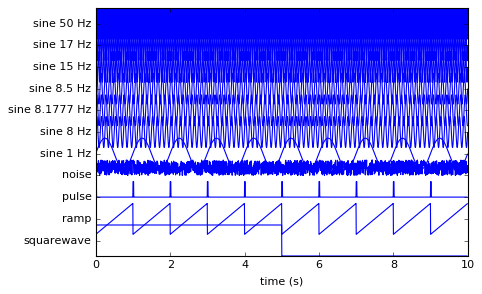

In [7]:
read_all()
plot_epoch()

/Users/clee/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


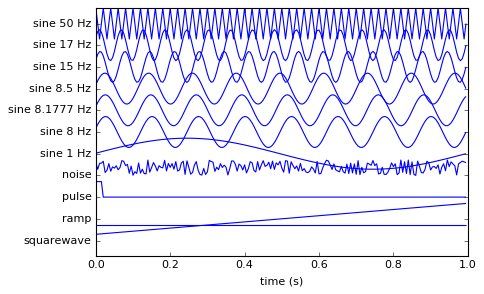

In [8]:
plot_epoch(duration=1.0)

In [9]:
s = allsig[9]+ allsig[10]

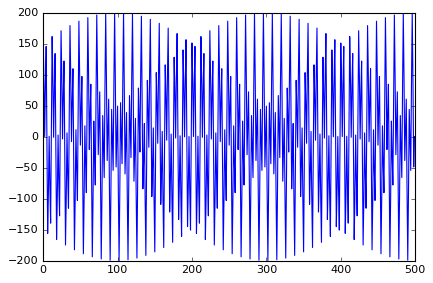

In [10]:
plot(s[0:500])